# Probability and Statistics Review

We'll review some fundamental statistical and probability theory you need to know to understand the how most machine learning algorithms, especially those in [Natural Language Processing](https://jeffchenchengyi.github.io/machine-learning/06-natural-language-processing/basics/README.html) and [Bayesian Methods](https://jeffchenchengyi.github.io/machine-learning/11-bayesian-methods/README.html) work.

### Table of Contents
1. [Basic Probability Theory](#bp)
- [Probability Distributions](#distributions)
- [Basic Statistics](#bs)
- [Hypothesis Testing](#hyptest)
- [$Z$-test](#z-test)
- [Student's $T$-test](#t-test)
- [Anova](#anova)
- [Chi-squared Test](#cs-test)
- [A/B Testing](#abtest)

## Preliminaries

### Expectation and Moments of Random Variable

Discrete:
- 1st Moment - $\mathbb{E}[X] = \sum^N_{i = 1}xf_xdx = \mu$
    - 1st Central Moment / Mean = 0
- [2nd Moment](https://www.youtube.com/watch?v=cwa2xONQFOc) - $\mathbb{E}[X^2] = \sum^N_{i = 1}x^2f_xdx$
    - 2nd Central Moment / Variance - $Var(X) = \mathbb{E}[(X - \mathbb{E}[X])^2] = \sum^N_{i = 1}(x - \mu)^2f_xdx \underset{\text{expand}}{=} \mathbb{E}[X^2] - \mathbb{E}[X]^2 = \sigma^2$
- 3rd Moment - $\mathbb{E}[X^2] = \sum^N_{i = 1}x^2f_xdx$

Continuous:
- 1st Moment - $\mathbb{E}[X] = \int^\infty_{-\infty}xf_xdx$
- 2nd Moment - $\mathbb{E}[X^2] = \int^\infty_{-\infty}x^2f_xdx$

$f_x$ is the output of the probability mass / distribution function @ $x$ 

### Kurtosis

### Skewness

### Expectation and Variance Properties

### Covariance and Correlation

### Population Vs. Sample Parameters

Population:
$$
\mathbb{E}[X] = \mu,\,Var(X) = \sigma^2
$$

Sample:
$$
\bar{x} = \frac{1}{N}\sum^N_{i=1}x_i,\,s^2 = \frac{1}{N-1}\sum^N_{i=1}{(x_i - \bar{x})}^2
$$

In [94]:
# Visualization / ML Libraries
from collections import namedtuple
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.font_manager as fm
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import seaborn as sns
from scipy.stats import norm, f, chi2

# plotting defaults
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (18, 12)
get_colors = lambda length: plt.get_cmap('Spectral')(np.linspace(0, 1.0, length))

In [82]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (18, 12)

---
# Probability Distributions<a id='distributions'></a>

## 1. Discrete

### Categorical

- Special case of **Multinomial** where $n=1$
- Distribution of possible results of a random variable that can take on one of $K$ possible categories, with the probability of each category separately specified
    - e.g. If we roll a dice, what's the probability that 3 comes up?

### Bernoulli

- Special case of **Binomial** where $n=1$
- Special case of **Categorical** where $k=2$
- Distribution of the number of success in a single $n=1$ Bernoulli trial ($k=2$, success / failure)
    - e.g. If a coin is tossed once, what is the probability it comes up heads?

### Binomial

- Special case of **Multinomial** where $k=2$
- Distribution of the number of success in $n$ **i.i.d.** Bernoulli trials ($k=2$, success / failure) **with** replacement
    - e.g. If a coin is tossed 20 times, what is the probability heads comes up exactly 14 times?

### Multinomial

- Distribution of the outcome of $n$ **i.i.d.** trials, where the outcome of each trial has a categorical distribution ($k>2$, multiple classes) **with** replacement
    - e.g. If we draw 5 colored balls from a bag, what is the probability that we get 2 blue balls, 2 red balls, and 1 green ball?

### Negative Binomial

- Distribution of the number of **i.i.d.** Bernoulli trials needed to get $k$ successes
    - e.g. If a coin is repeatedly tossed, what is the probability the 3rd time heads appears occurs on the 9th toss?

### Geometric

- Special case of **Negative Binomial** where $k=1$
- Distribution of the number of **i.i.d.** Bernoulli trials needed to get the first success
    - e.g. If a coin is repeatedly tossed, what is the probability that the **first** time heads appears occurs on the 8th toss?

### Hypergeometric

- Binomial closely approximates Hypergeometric if we are sampling only a small fraction of the population
- Distribution of the number of success in $n$ **i.i.d.** Bernoulli trials ($k=2$, success / failure) **without** replacement
    - e.g. If 5 cards are drawn without replacement, what is the probability 3 hearts are drawn?

### Poisson

- Distribution of the number of **i.i.d.** events in a given time / length / area / volume
    - e.g. What is the probability there will be 4 car accidents on a university campus in a given week?

## 2. Continuous

### Normal

$$
\chi \sim \mathcal{N}(\mu, \sigma^2)
$$

PDF:
$$
f(x \vert \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

### Chi-squared

$$
Q = \sum^k_{i=1}\chi_i^2
$$

- $\chi_i,..., \chi_k$ are independent, standard normal random variables, then the sum of their squares
- $k$ is the degrees of freedom

PDF:
$$
\frac{1}{}
$$

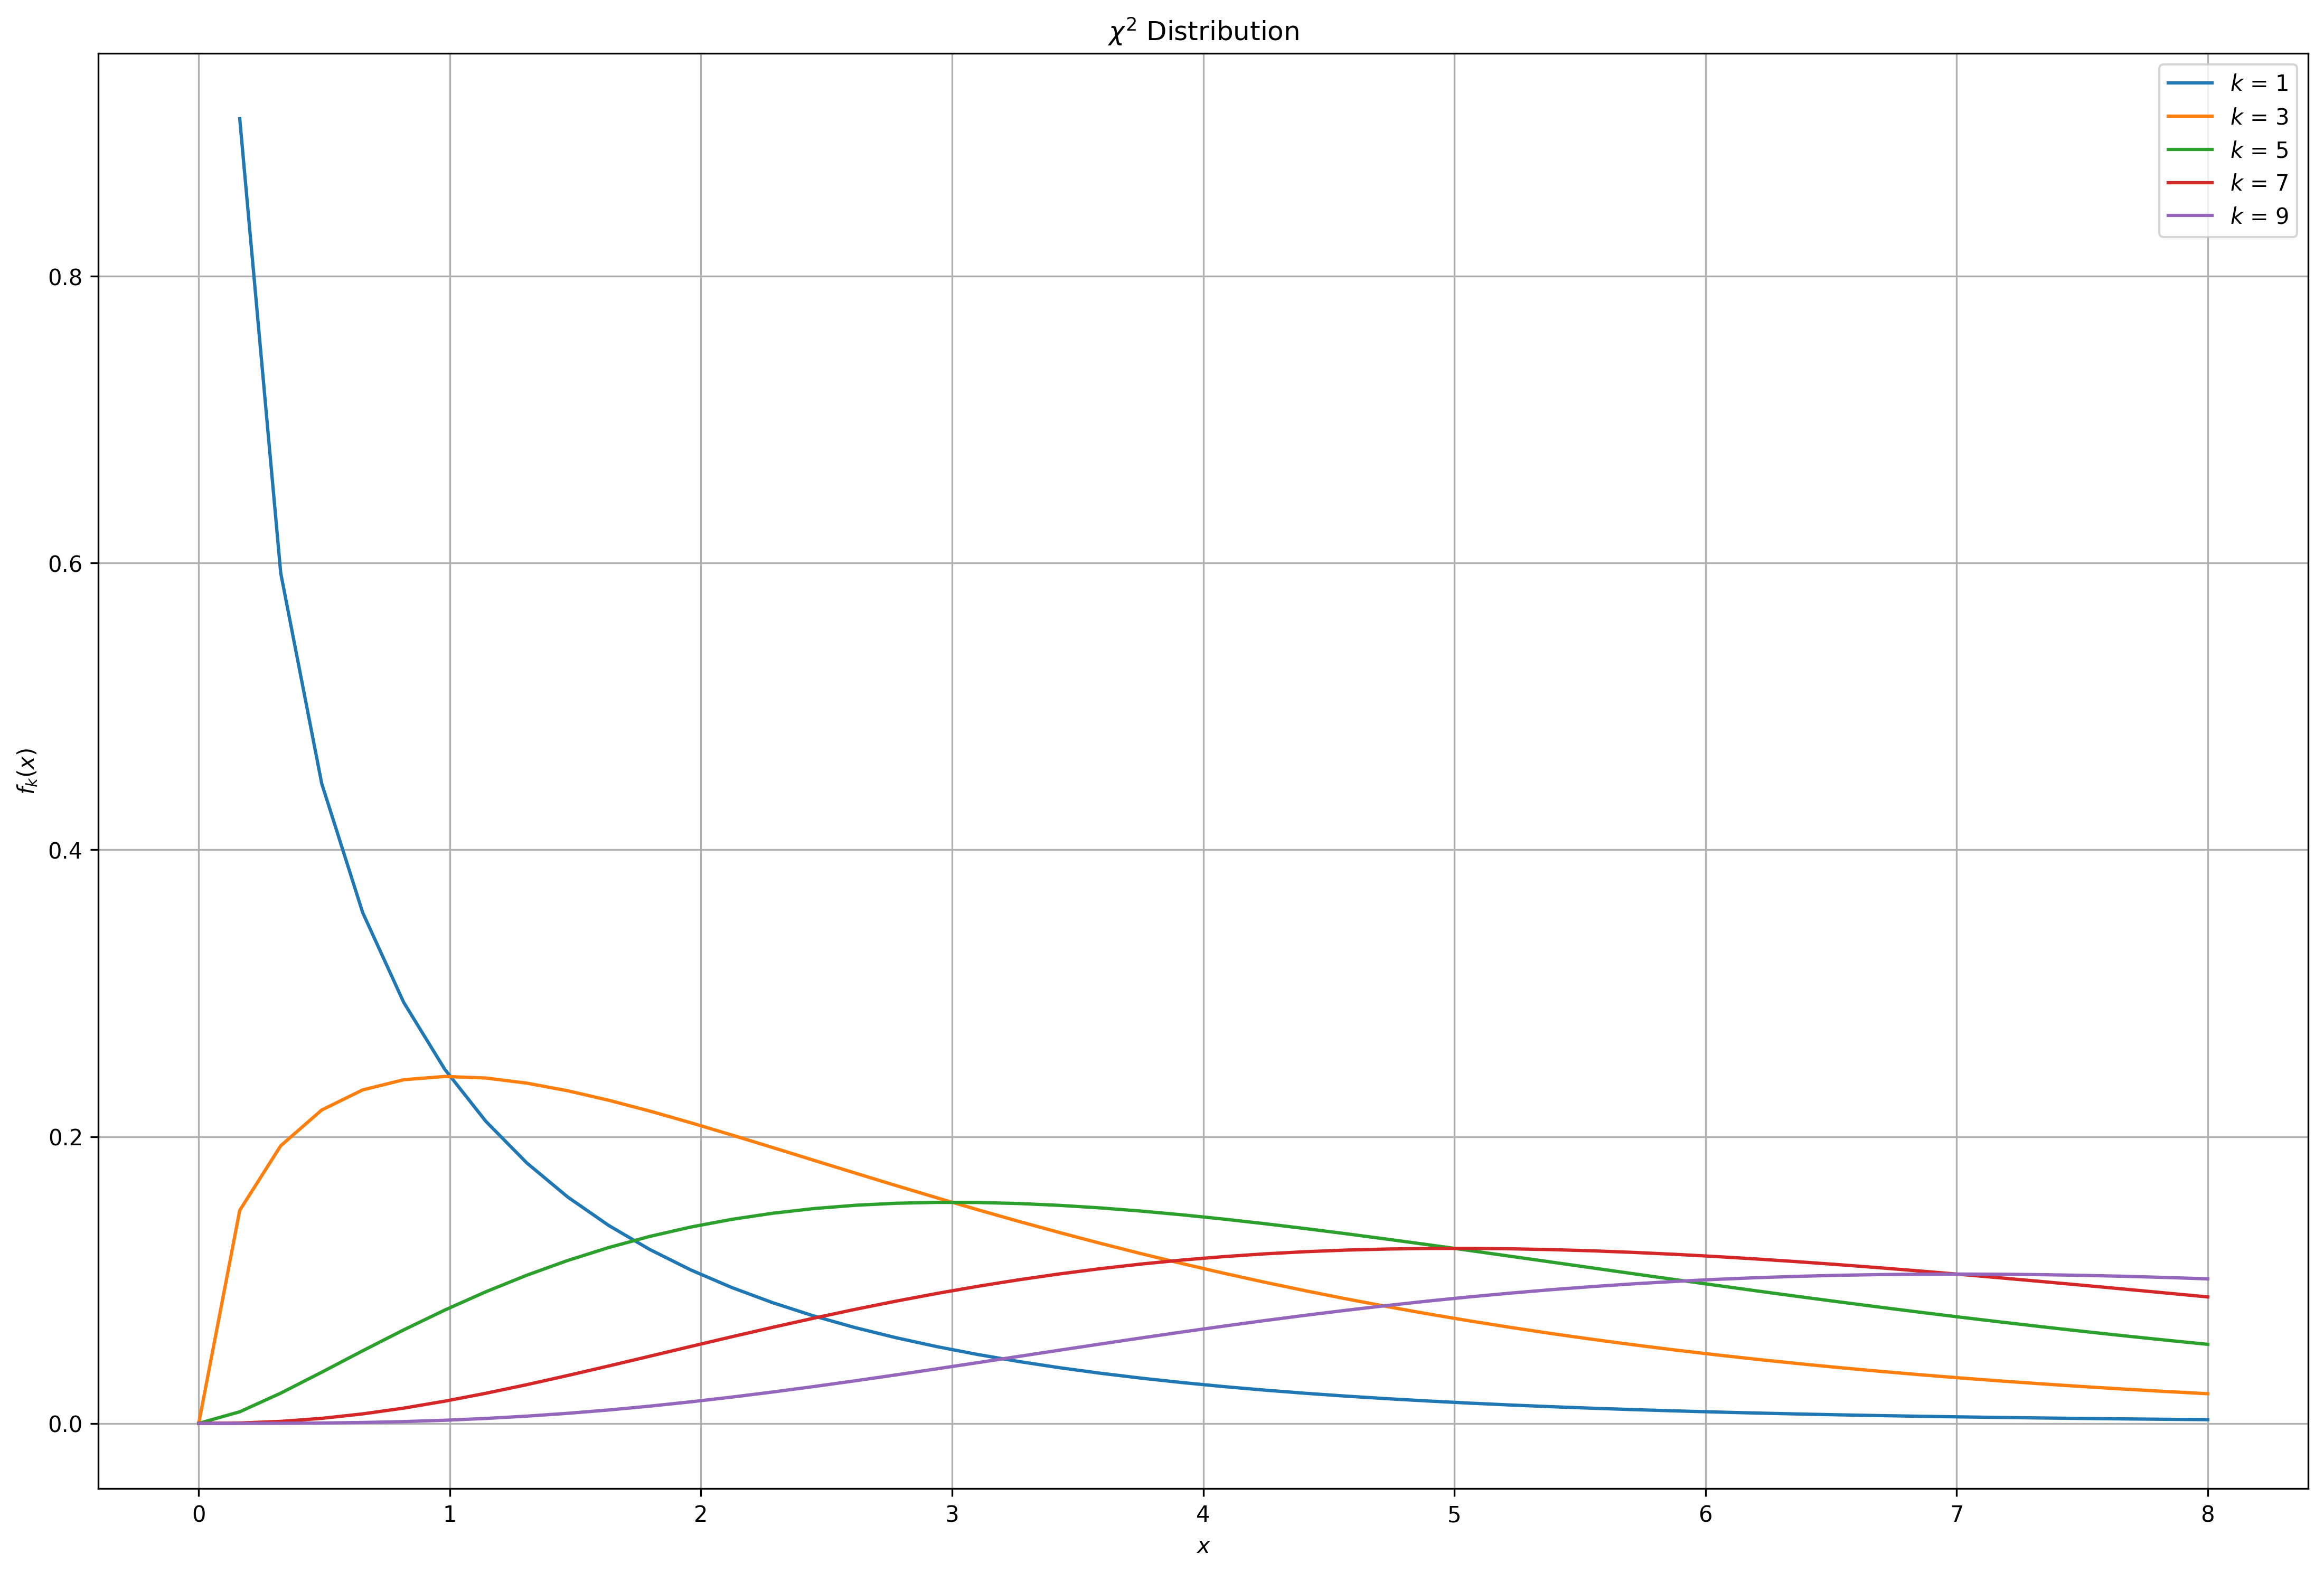

In [92]:
# Plot Chi^2 distribution for varying degrees
# of freedom
fig, ax = plt.subplots(1, 1)
for k in range(1, 10, 2):
    ax.plot(np.linspace(0, 8), chi2(k).pdf(np.linspace(0, 8)), label='$k$ = {}'.format(k))
ax.grid()
ax.legend()
ax.set_title('$\chi^2$ Distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$f_k(x)$')
plt.show();

We note that as the degrees of freedom increases, the peak of the curve shifts to the right as we add up more and more squared normally distributed random variables.

### Exponential

- Special case of **Gamma** where $n=1$, Continuous counterpart of **Geometric**
- Distribution of the time between events in a Poisson point process, i.e., a process in which events occur continuously and independently at a constant average rate.
    - e.g. How much time will pass until the next plane lands on a landing strip?

### Gamma

- Gamma : Exponential :: Binomial : Bernoulli
- Distribution of 
    - e.g. How much time will pass until $n$ planes land on any given landing strip

### Wishart / Multivariate Gamma

- Multivariate Generalization of **Gamma**
- Gamma : Wishart :: Beta : Dirichlet
- Distribution of 
    - e.g. 

### Beta

- Special case of **Dirichlet**
- Distribution over real values on the interval [0, 1]
    - e.g. What is probability of 27% of people getting infected by the disease?

### Dirichlet / Multivariate Beta

$$
f \left(x_1,\ldots, x_{K}; \alpha_1,\ldots, \alpha_K \right) = \frac{1}{\mathrm{B}(\boldsymbol\alpha)} \prod_{i=1}^K x_i^{\alpha_i - 1}
$$

where $ \{ x_k \}_{ k=1 }^{ k=K }$ belong to the standard $K-1$ simplex, or in other words: $\sum_{i=1}^{K} x_i=1 \text{ and } x_i \geq 0 \text{ for all } i \in [1,K]$

The normalizing constant is the multivariate beta function, which can be expressed in terms of the gamma function:

$$
\mathrm{B}(\boldsymbol\alpha) = \frac{\prod_{i=1}^K \Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^K \alpha_i\right)},\qquad\boldsymbol{\alpha}=(\alpha_1,\ldots,\alpha_K)
$$

- Multivariate Generalization of **Beta**
- Beta : Dirichlet :: Binomial : Multinomial :: Gamma : Wishart
- Conjugate Prior of Multinomial and Categorical
- When $\alpha=1$, Dirichlet is essentially a uniform distribution as it gives each $x_i$ equally probability of $\frac{1}{\text{normalizing constant}\,{\mathrm{B}(\boldsymbol\alpha)} }$, this is called a flat Dirichlet distribution
- Distribution over vectors whose values are all in the interval [0, 1] and sum of values in the vector = 1, AKA a probability simplex
    - e.g. 

### Symmetric Dirichlet

- Special case of **Dirichlet** where vector $\mathbf{\alpha}$ has all the same values

## Conjugate Priors

- If the posterior distributions $p(\theta \mid X)$ are in the same probability distribution family as the prior probability distribution $p(\theta)$, the prior and posterior are then called conjugate distributions, and the prior is called a conjugate prior for the likelihood function $p(X \mid \theta)$.

Probability distribution families:
1. Exponential Family
    - normal
    - exponential
    - gamma
    - chi-squared
    - beta
    - Dirichlet
    - Bernoulli
    - categorical
    - Poisson
    - Wishart
    - inverse Wishart
    - geometric
    - binomial (with fixed number of trials)
    - multinomial (with fixed number of trials)
    - negative binomial (with fixed number of failures)

---
# Hypothesis Testing

There are 2 probability distributions that we deal with when talking about Hypothesis testing:
1. Sampling Distribution when $H_0$ is indeed **True** (Normal $\because$ Central Limit Theorem)
    - In a basic statistics class, we care about this distribution and draw the $\alpha$ level and p-value here
    - Define a significance level = P(Type I error) = P(False Positive) 
    
    
2. Sampling Distribution when $H_0$ is indeed **False** (Normal $\because$ Central Limit Theorem)

| Truth Table | $$P(H_0 = \text{True})$$ | $$P(H_0 = \text{False})$$ |
| ------------- | ------------- | ------------- |
| Accept $H_0$, Reject $H_\alpha$ | $$\begin{aligned}P(\text{Accept}\,H_0 \mid H_0=\text{True}) &= P(\text{True Accept}) \\ &= 1 - \alpha \end{aligned}$$ | $$\begin{aligned}P(\text{Accept}\,H_0 \mid H_0=\text{False}) &= P(\text{Type II error}) \\ &= \beta \end{aligned}$$ |
| Reject $H_0$, Accept $H_\alpha$ | $$\begin{aligned}P(\text{Reject}\,H_0 \mid H_0=\text{True}) &= P(\text{Type I error}) \\ &= \alpha \end{aligned}$$ | $$\begin{aligned}P(\text{Reject}\,H_0 \mid H_0=\text{False}) &= \text{Power} \\ &= 1 - \beta \end{aligned}$$ |
| Sum | $$(1 - \alpha) + (\alpha) = 1$$ | $$(\beta) + (1 - \beta) = 1$$ |

Relationship between $\alpha$ and $\beta$:
- If we choose a very small value of $\alpha$, we will make it very difficult to reject $H_0$, making Type II errors, hence $\beta$ higher
- Normally we care more about Type I errors, so we'll set the $\alpha$ value at the start of the hypothesis test

## Calculating Power and Probability of Type II error, $\beta$ (One-Tailed Example)

Suppose we are about to randomly sample 36 values from a normally distributed population, where $\sigma=21$, but $\mu$ is unknown. We are going to test:

$$
\begin{aligned}
H_0 &: \mu = 50 \\
H_{\alpha} &: \mu < 50
\end{aligned}
$$ at $\alpha=0.09$

1. For what values of $Z = \frac{\bar{X}-\mu_0}{\frac{\sigma}{\sqrt{n} } }$ will we reject $H_0$?

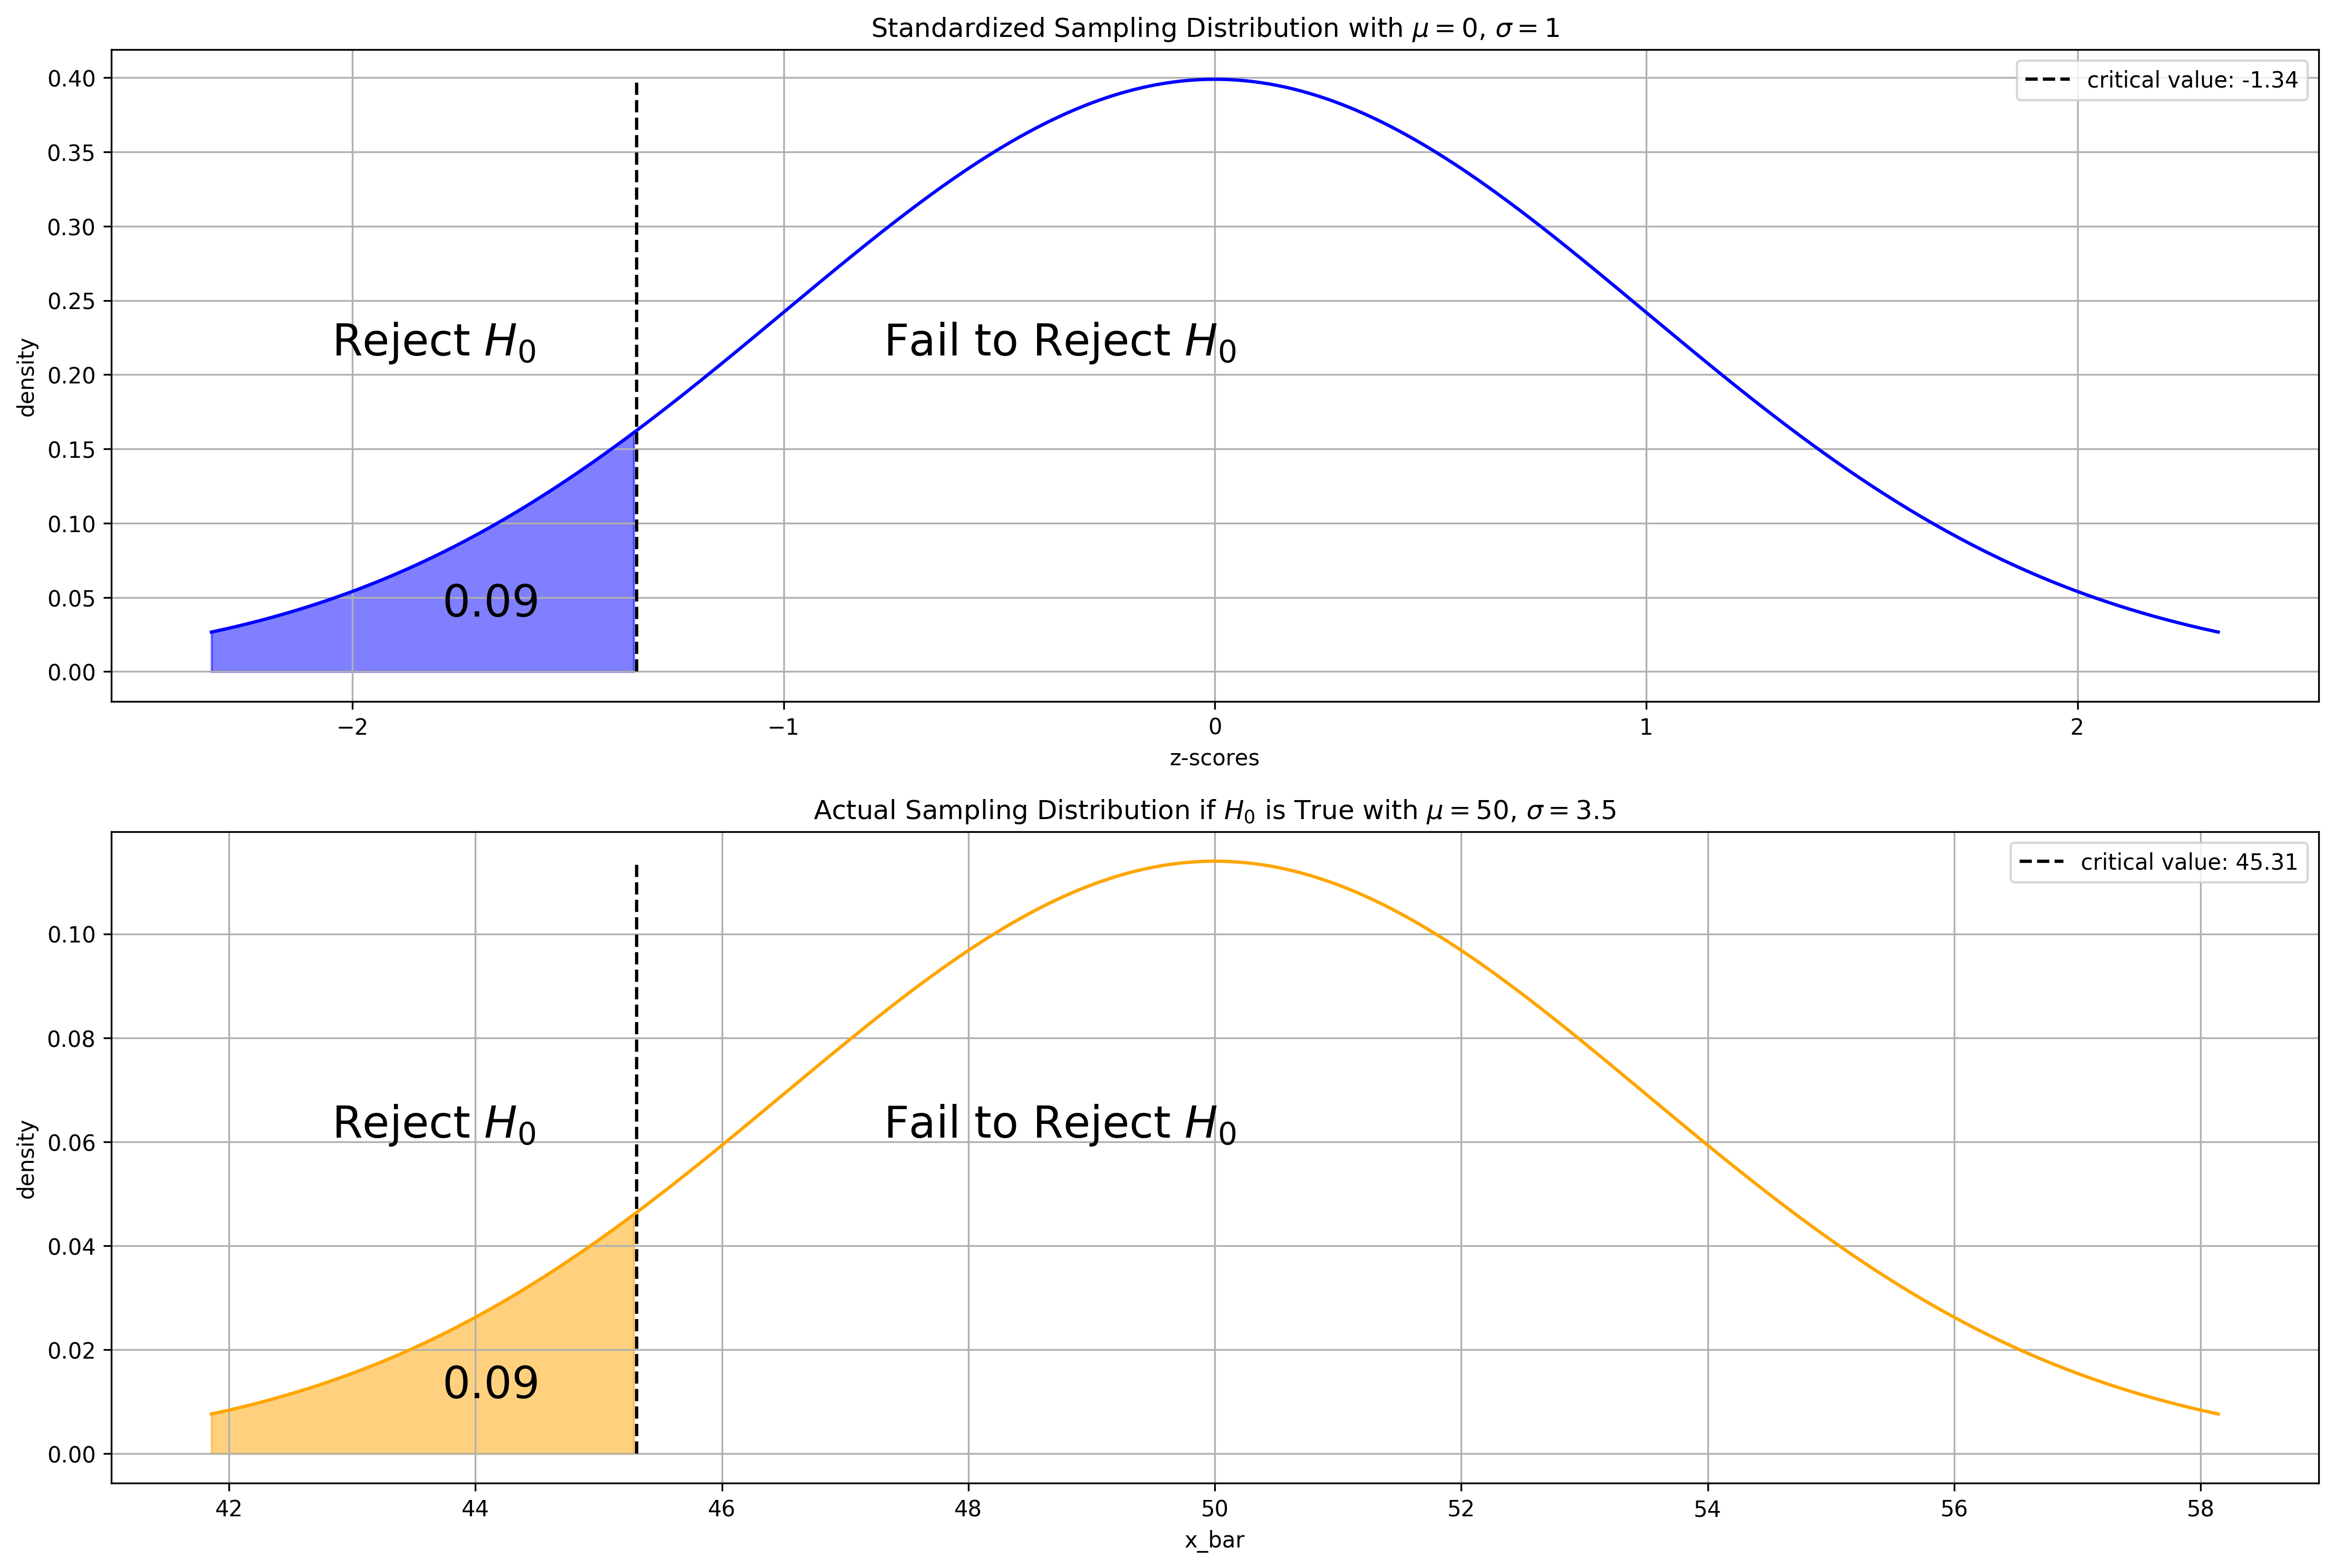

In [32]:
def plot_dists_given_H0_true(mean, std, n, alpha):
    """
    Function:
    ---------
    Plots the actual and standardized sampling distribution and the rejection
    region given alpha, the significance level (Allowance for Type I error)
    
    Parameters:
    -----------
    mean: The sampling mean 
    std: The standard deviation
    n: Number of samples
    alpha: significance level (Allowance for Type I error)
    
    Returns:
    --------
    None. Plots the sampling distribution both standardized and actual
    """
    fig, ax = plt.subplots(2, 1)
    
    # Standard error of the mean / STD of sampling distribution
    sem = std / np.sqrt(n)
    sampling_dist = norm(loc=0, scale=1)
    p_crit = sampling_dist.ppf(alpha)

    # Plot the standardized sampling distribution
    sample_mean_z_scores = np.linspace(start=sampling_dist.ppf(0.01), 
                                       stop=sampling_dist.ppf(0.99), num=500)
    y = sampling_dist.pdf(sample_mean_z_scores)
    ax[0].plot(sample_mean_z_scores, y, c='blue')
    ax[0].vlines(p_crit, 0, np.max(y),
                 linestyles = '--', label='critical value: {}'.format(np.round(p_crit, 2)))
    ax[0].fill_between(sample_mean_z_scores, y, where=(sample_mean_z_scores <= p_crit), alpha=.5, color='blue')
    ax[0].set_xlabel('z-scores')
    ax[0].set_ylabel('density')
    ax[0].set_title('Standardized Sampling Distribution with $\mu=${}, $\sigma=${}'.format(0, 1))
    ax[0].grid()
    ax[0].legend()
    ax[0].text(0.10, 1.75, 'Reject $H_0$', transform=ax[1].transAxes, fontsize=20,
               verticalalignment='center')
    ax[0].text(0.35, 1.75, 'Fail to Reject $H_0$', transform=ax[1].transAxes, fontsize=20,
               verticalalignment='center')
    ax[0].text(0.15, 1.35, str(alpha), transform=ax[1].transAxes, fontsize=20,
               verticalalignment='center')
    
    # Plot the sampling distribution if Null Hypothesis was true
    actual_dist = norm(loc=50, scale=sem)
    x_bar = np.linspace(start=actual_dist.ppf(0.01), 
                        stop=actual_dist.ppf(0.99), num=500)
    y = actual_dist.pdf(x_bar)
    ax[1].plot(x_bar, y, c='orange')
    ax[1].vlines((p_crit*sem)+mean, 0, np.max(y),
                 linestyles = '--', label='critical value: {}'.format(np.round((p_crit*sem)+mean, 2)))
    ax[1].fill_between(x_bar, y, where=(x_bar <= (p_crit*sem)+mean), alpha=.5, color='orange')
    ax[1].set_xlabel('x_bar')
    ax[1].set_ylabel('density')
    ax[1].set_title('Actual Sampling Distribution if $H_0$ is True with $\mu=${}, $\sigma=${}'.format(mean, sem))
    ax[1].grid()
    ax[1].legend()
    ax[1].text(0.10, 0.55, 'Reject $H_0$', transform=ax[1].transAxes, fontsize=20,
               verticalalignment='center')
    ax[1].text(0.35, 0.55, 'Fail to Reject $H_0$', transform=ax[1].transAxes, fontsize=20,
               verticalalignment='center')
    ax[1].text(0.15, 0.15, str(alpha), transform=ax[1].transAxes, fontsize=20,
               verticalalignment='center')
    
    plt.show();
    
plot_dists_given_H0_true(mean=50, std=21, n=36, alpha=0.09)

We will reject $H_0$ for $Z < -1.34$ or $\bar{X} < 45.31.$

2. If $\mu=43$, what is $P(\text{Type II error})$?

$$
\begin{aligned}
H_0 &: \mu = 50 \\
H_{\alpha} &: \mu < 50
\end{aligned}
$$

$P(\text{Type II error}) = P(\text{Fail to Reject}\,H_0 \mid \mu=43) = P(\bar{X} > 45.31 \mid \mu=43) = \beta$

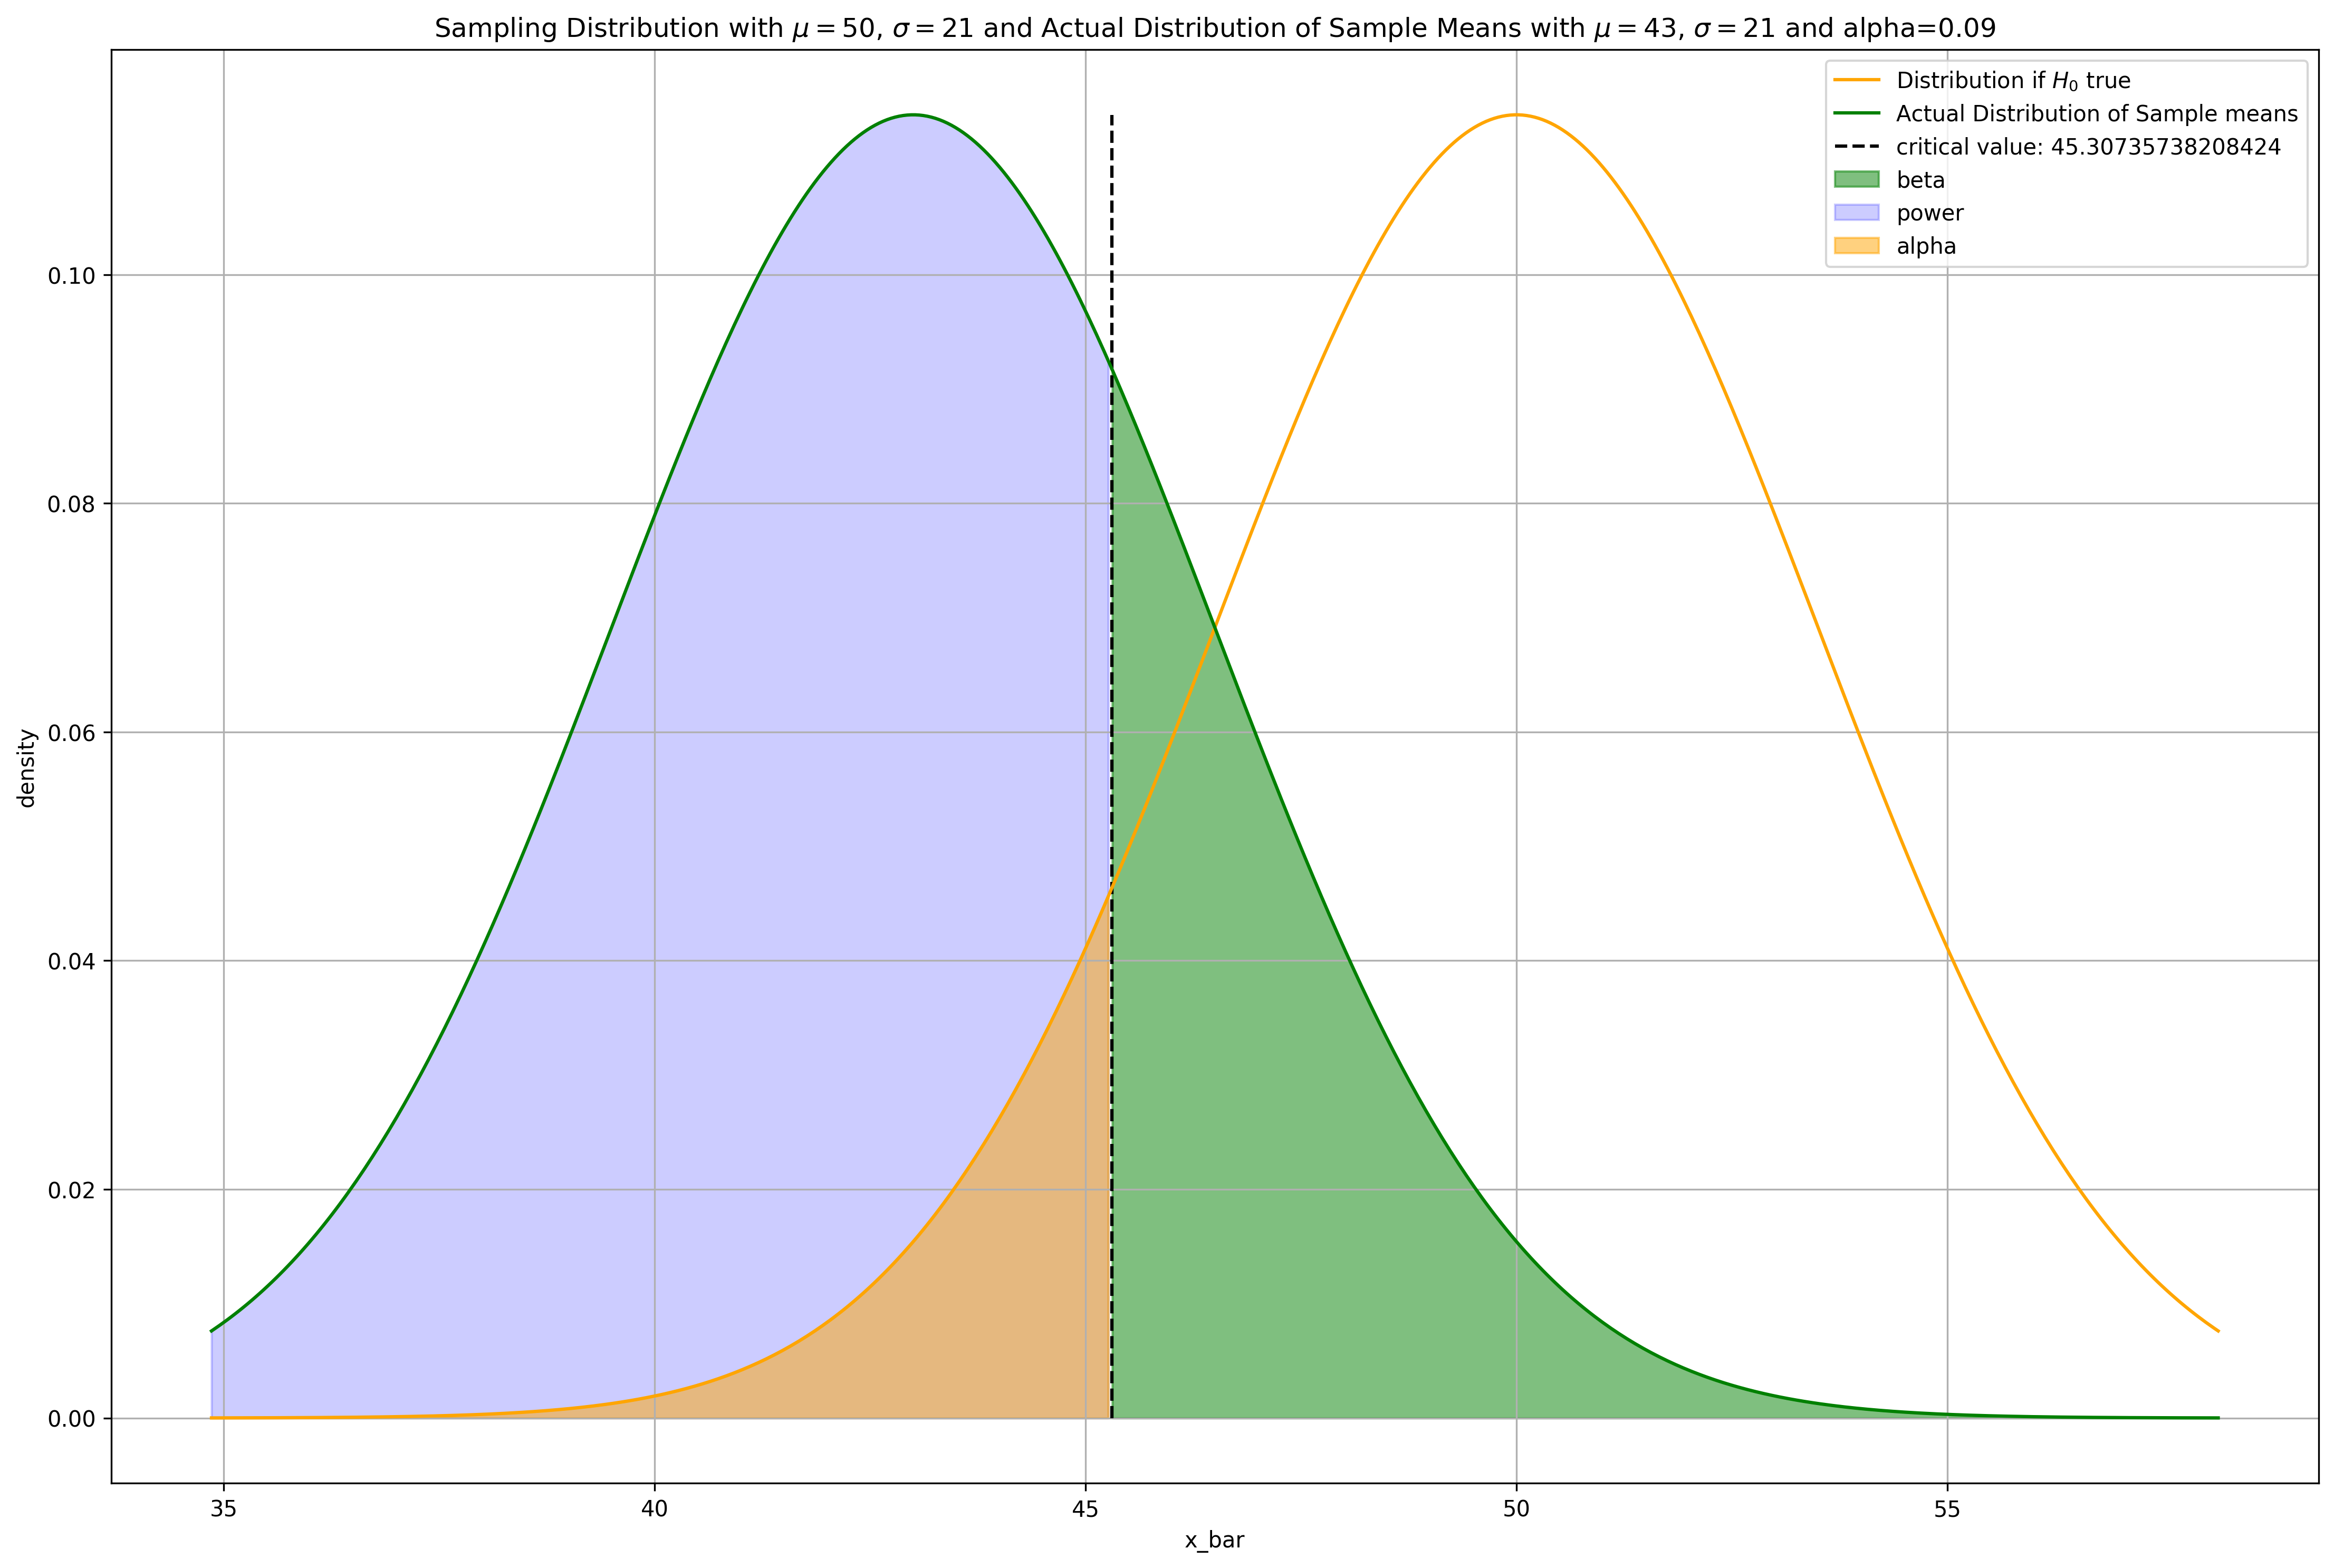

In [58]:
def plot_H0_true_dist_and_actual_dist(ax, H0_mean, actual_mean, std, n, alpha):
    
    # Get H0 true distribution, and the actual distribution
    sem = std / np.sqrt(n)
    critical_val = (norm(loc=0, scale=1).ppf(alpha) * sem) + H0_mean
    H0_true_dist = norm(loc=H0_mean, scale=sem)
    actual_dist = norm(loc=actual_mean, scale=sem)

    # Plot the H0 true distribution
    x_bar_H0_true = np.linspace(start=actual_dist.ppf(0.01),
                                stop=H0_true_dist.ppf(0.99), num=500)
    y_H0_true = H0_true_dist.pdf(x_bar_H0_true)
    ax.plot(x_bar_H0_true, y_H0_true, c='orange', label='Distribution if $H_0$ true')
    
    # Plot the actual distribution
    x_bar_actual = np.linspace(start=actual_dist.ppf(0.01),
                               stop=H0_true_dist.ppf(0.99), num=500)
    y_actual = actual_dist.pdf(x_bar_actual)
    ax.plot(x_bar_actual, y_actual, c='green', label='Actual Distribution of Sample means')
    
    # PLot critical value
    ax.vlines(critical_val, 0, np.max(y_actual),
              linestyles = '--', label='critical value: {}'.format(critical_val))
    ax.fill_between(x_bar_actual, y_actual, where=(x_bar_actual > critical_val), alpha=.5, color='green', label='beta')
    ax.fill_between(x_bar_actual, y_actual, where=(x_bar_actual < critical_val), alpha=.2, color='blue', label='power')
    ax.fill_between(x_bar_H0_true, y_H0_true, where=(x_bar_H0_true < critical_val), alpha=.5, color='orange', label='alpha')
    ax.set_xlabel('x_bar')
    ax.set_ylabel('density')
    ax.set_title('Sampling Distribution with $\mu=${}, $\sigma=${} and Actual Distribution of Sample Means with $\mu=${}, $\sigma=${} and alpha={}'.format(H0_mean, std, actual_mean, std, alpha))
    ax.grid()
    ax.legend()
    return ax
    
fig, ax = plt.subplots(1, 1)
plot_H0_true_dist_and_actual_dist(ax=ax, H0_mean=50, actual_mean=43, std=21, n=36, alpha=0.09);

$P(\bar{X} > 45.31 \mid \mu=43)=$ The Shaded region $\underset{\text{Standardize} }{\rightarrow} P(Z > \frac{45.31 - 43}{\frac{21}{\sqrt{36} } }) = P(Z > 0.66) = 0.255 = \beta$ . 

$$
\therefore \beta = 0.255 \\
\text{Power of Test (Ability to detect a False }H_0)=P(\text{Reject }H_0\mid \mu=43)=1-\beta=0.745
$$

## Effect of changes in $\alpha, n, \mu, \sigma$ on Power $1-\beta$

Power increases as:
- $\alpha$ increases
- $n$ increases
- $\sigma$ decreases
- The true value of $\mu$ gets further from $\mu_0$ (in the direction of the alternate hypothesis)

### As $\alpha$ increases,

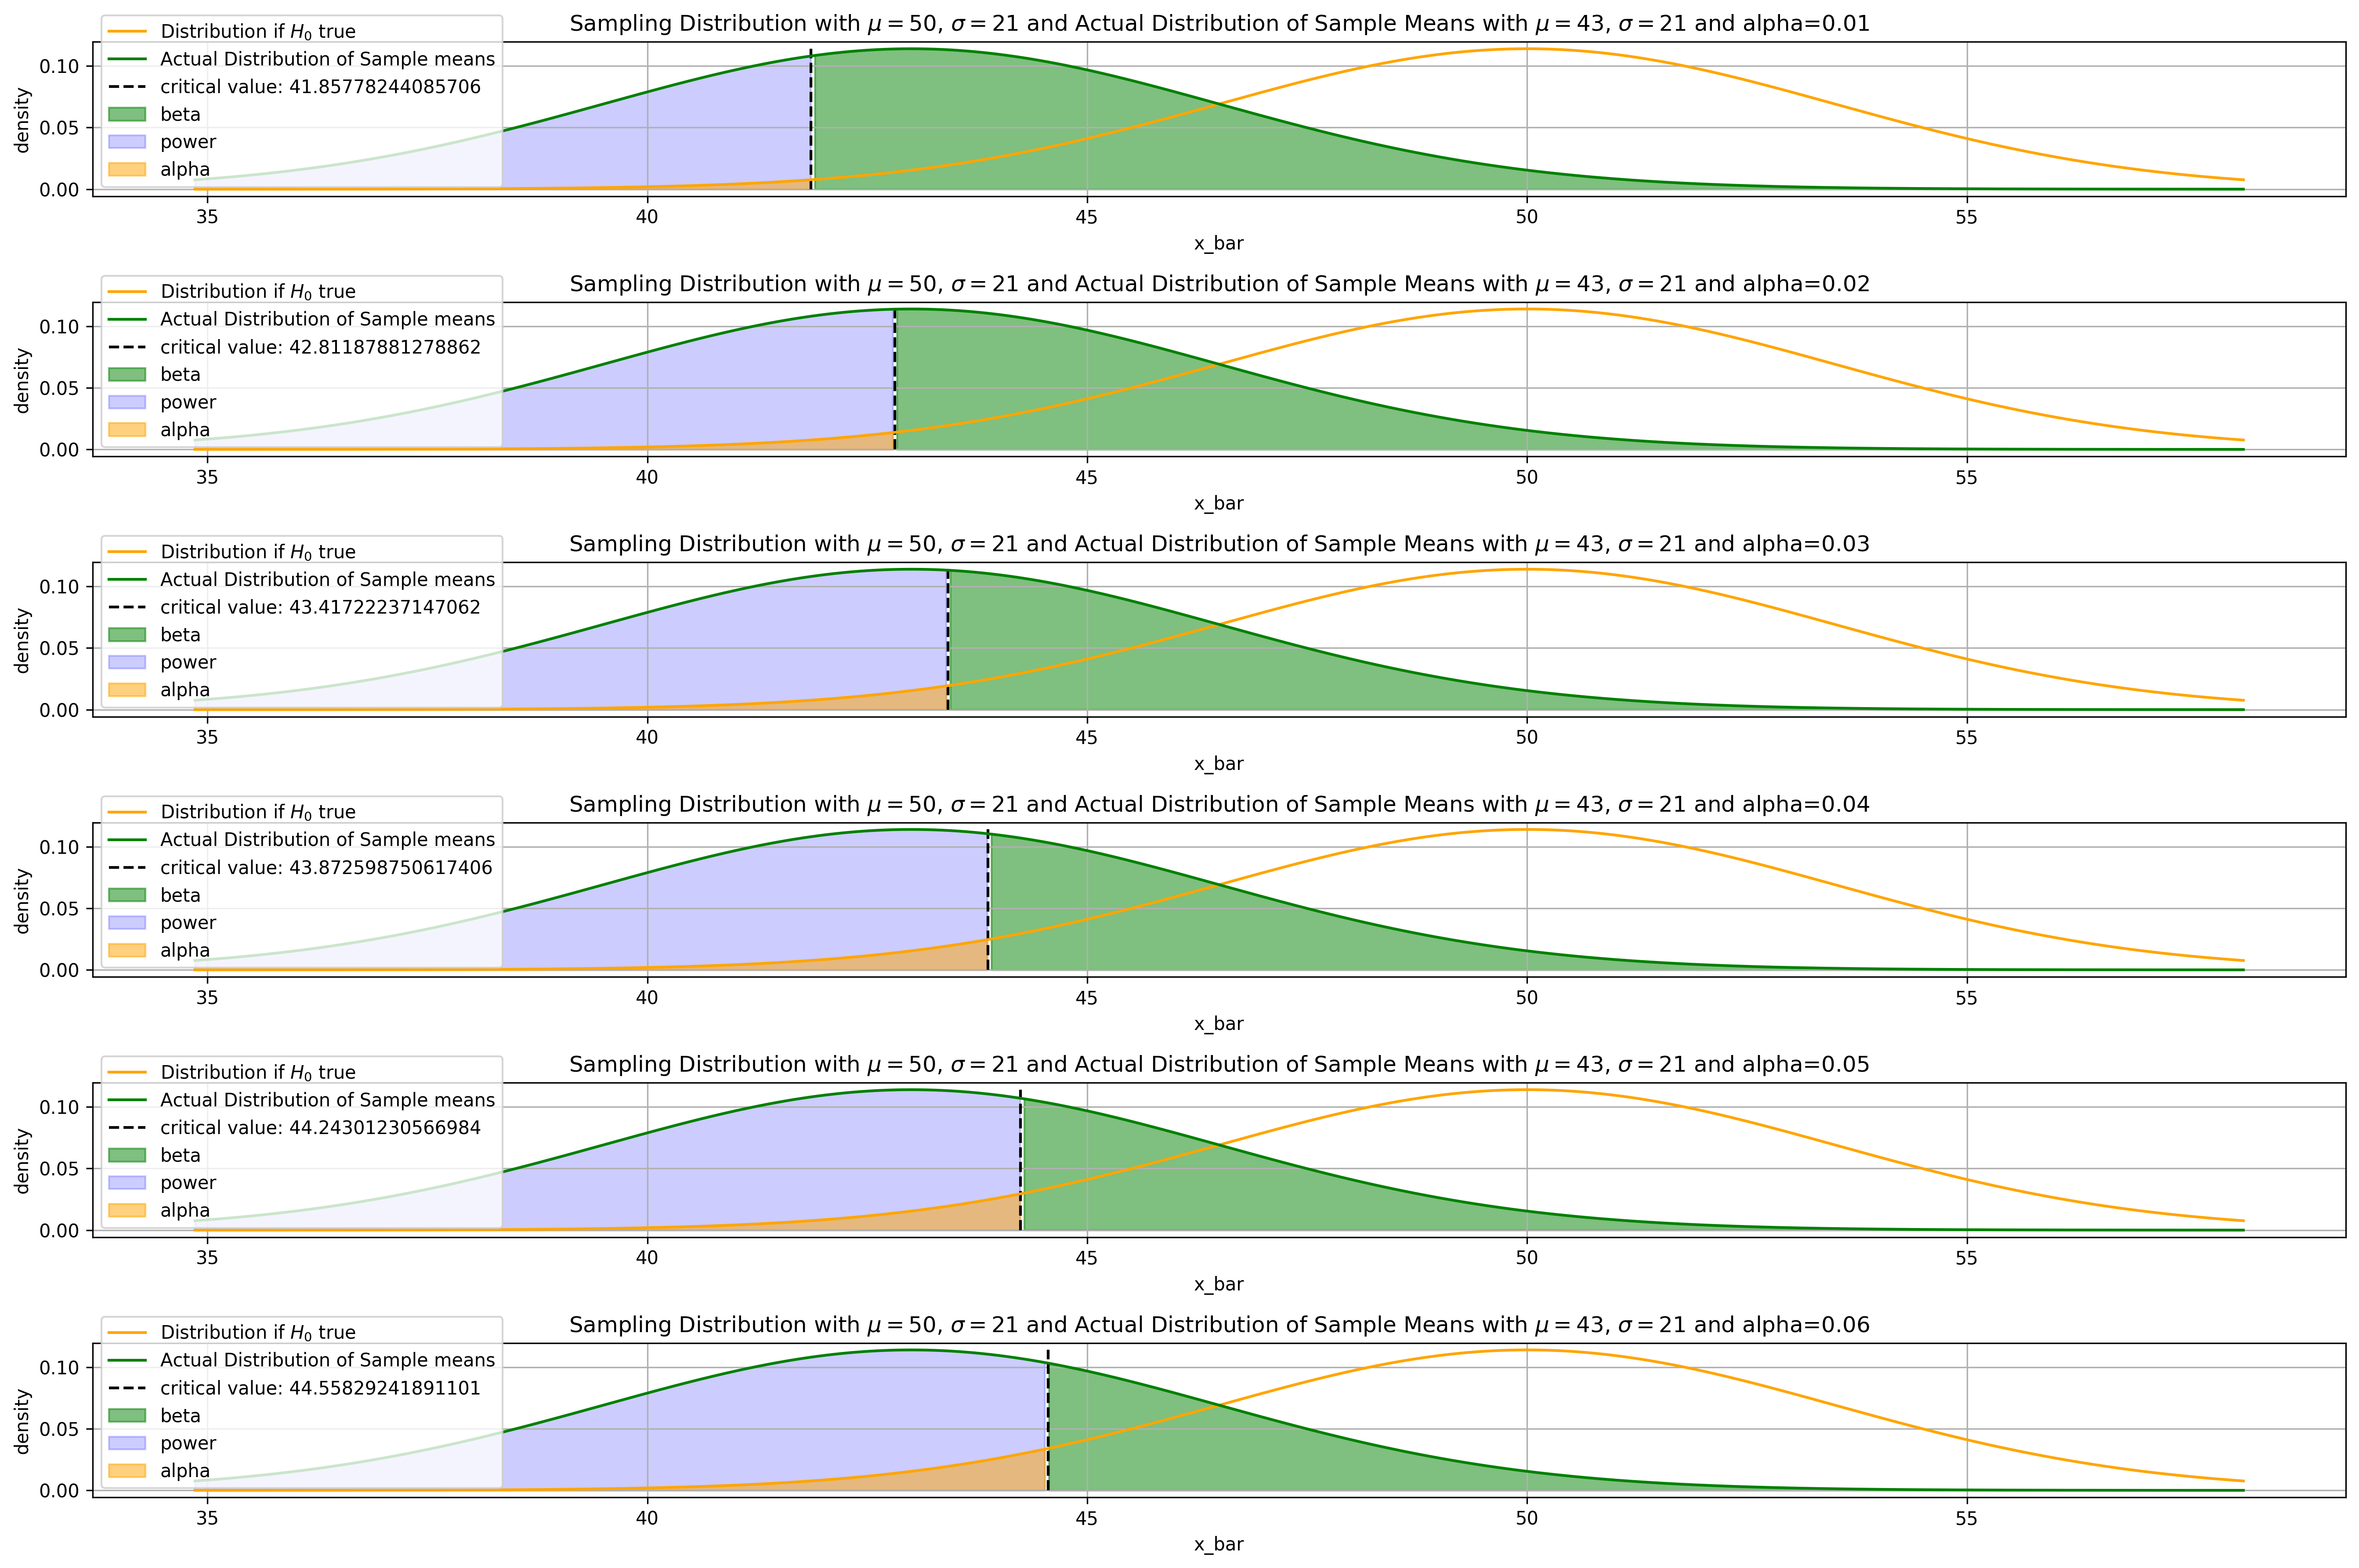

In [60]:
fig, ax = plt.subplots(6, 1)
for idx in range(1, 7):
    ax[idx-1] = plot_H0_true_dist_and_actual_dist(
        ax=ax[idx-1], 
        H0_mean=50, 
        actual_mean=43, 
        std=21, 
        n=36, 
        alpha=(idx*0.01))
    
plt.tight_layout()
plt.show();

### As $n$ increases, both distributions become sharper $\because S.E.M. = \frac{\sigma}{\sqrt{n} }$

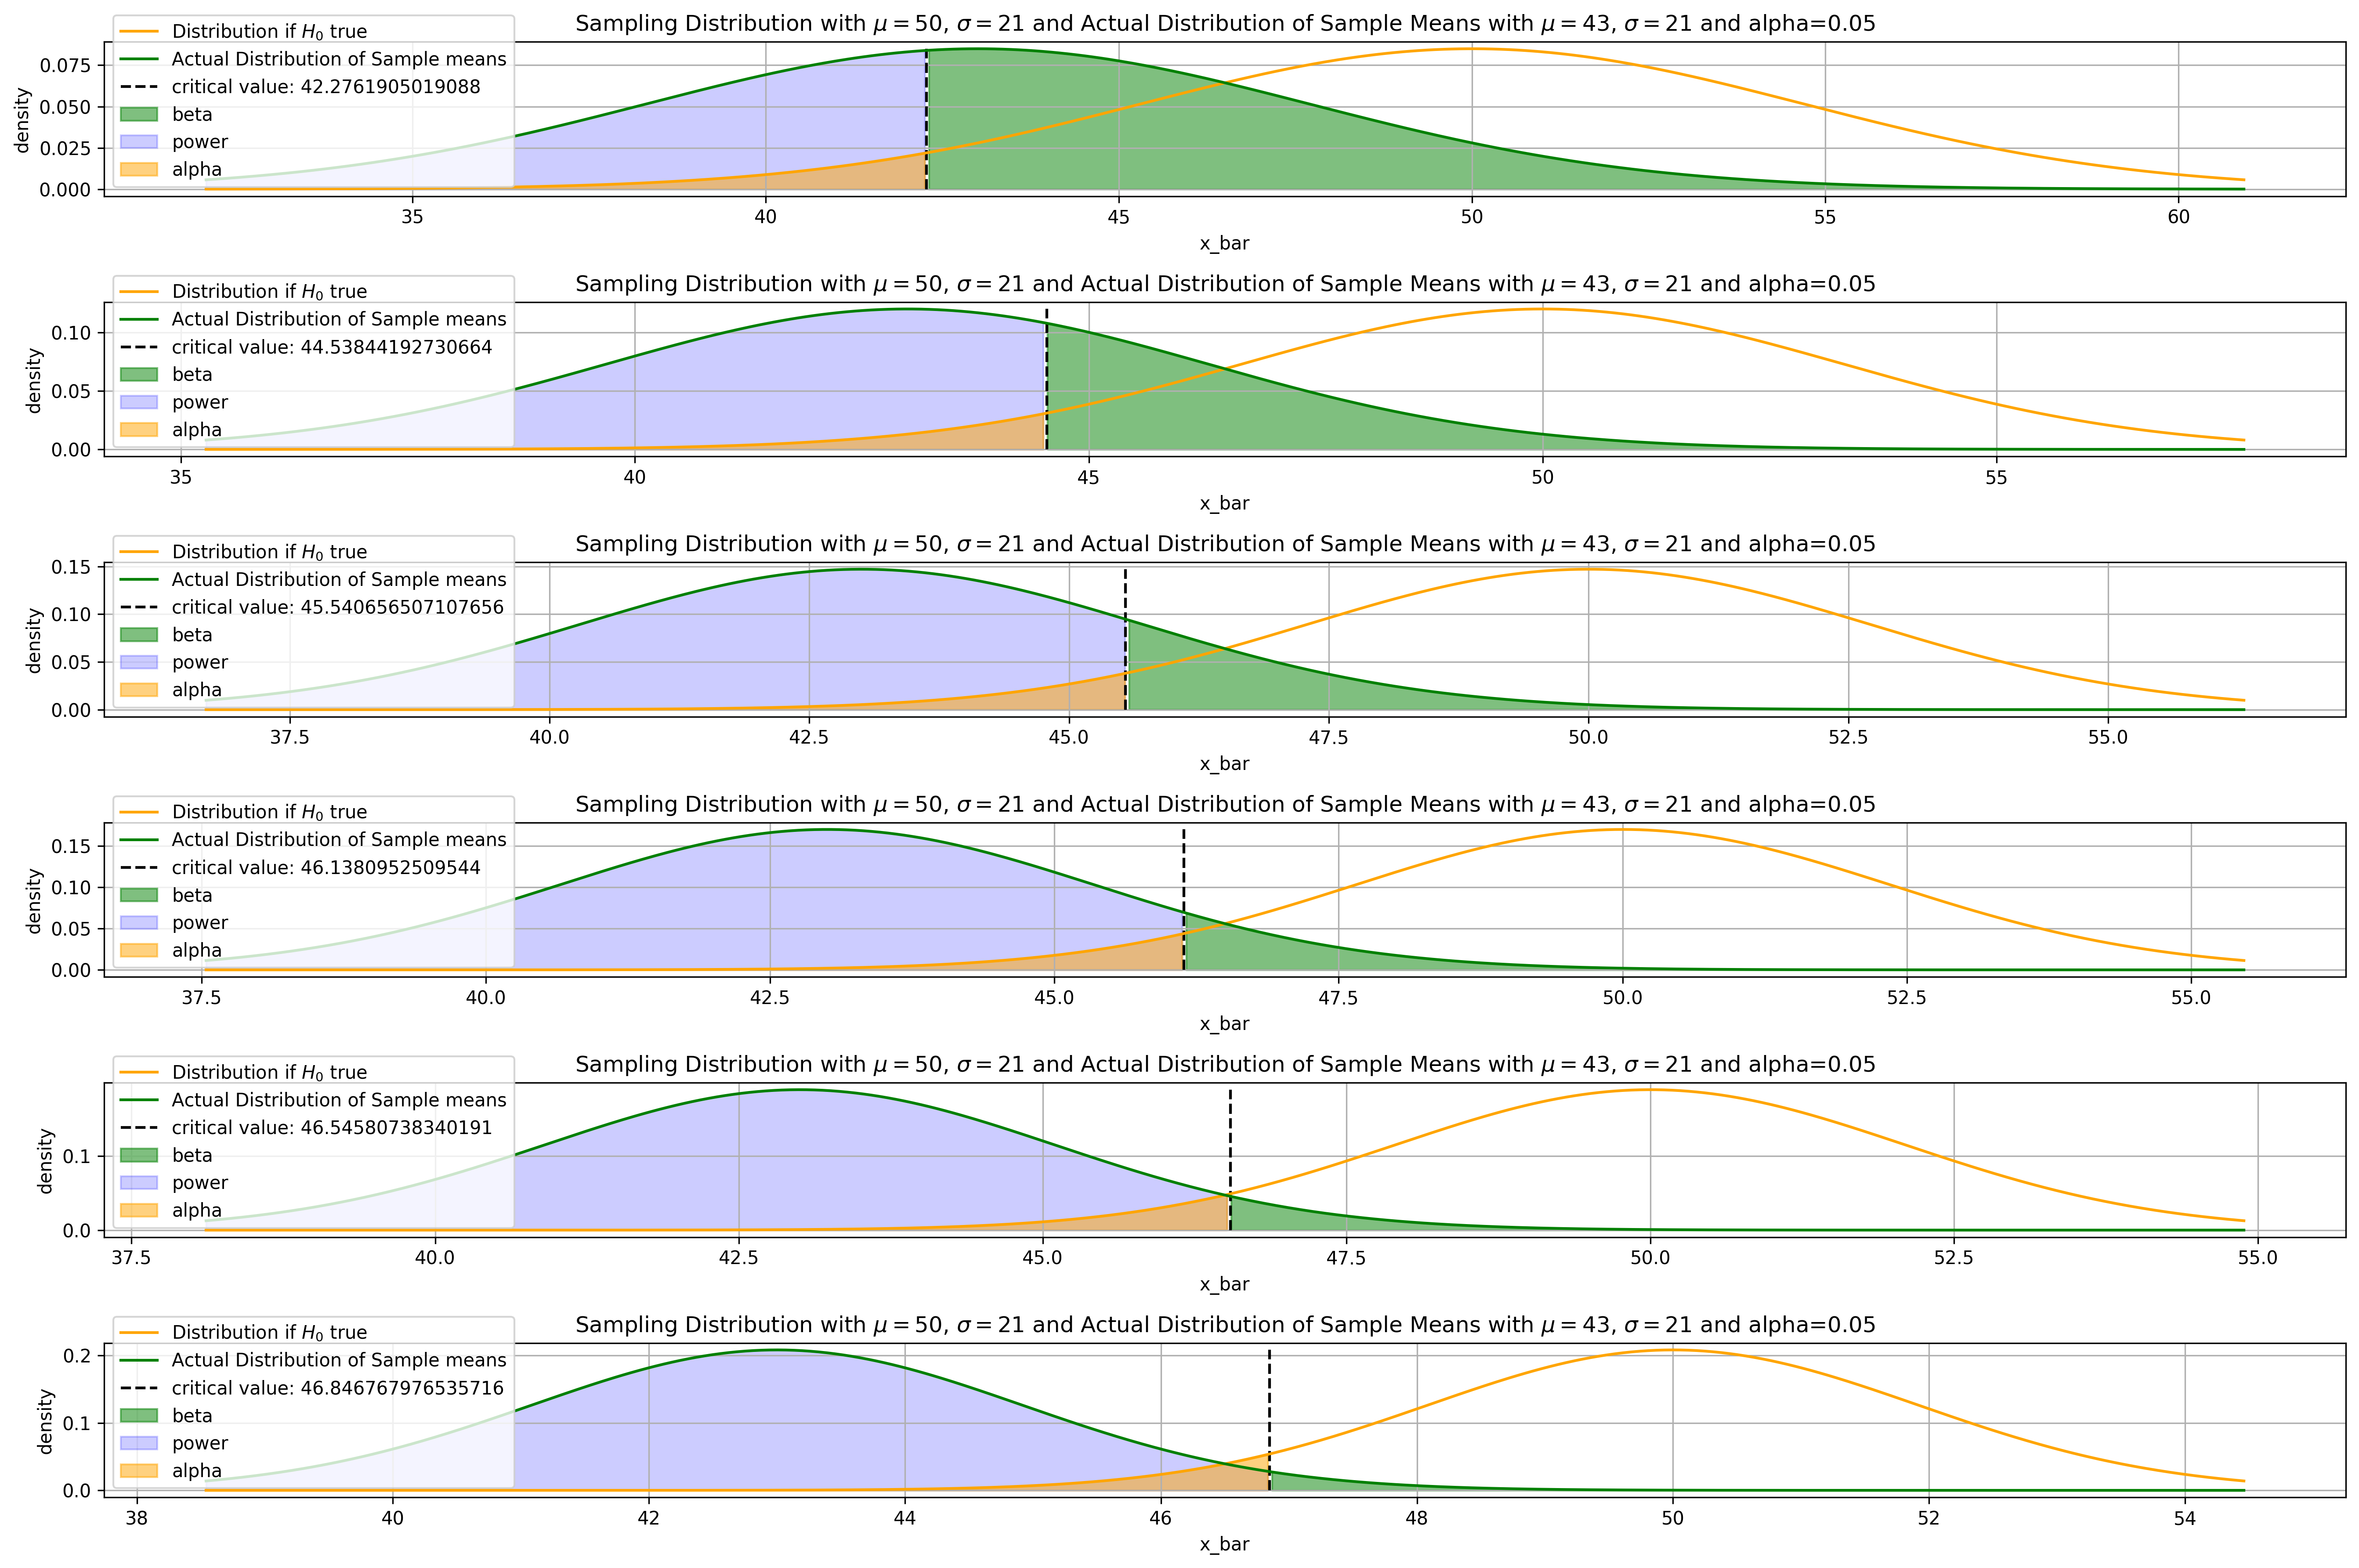

In [61]:
fig, ax = plt.subplots(6, 1)
for idx in range(1, 7):
    ax[idx-1] = plot_H0_true_dist_and_actual_dist(
        ax=ax[idx-1], 
        H0_mean=50, 
        actual_mean=43, 
        std=21, 
        n=idx*20, 
        alpha=0.05)
    
plt.tight_layout()
plt.show();

### As $\sigma$ decreases, both distributions become sharper $\because S.E.M. = \frac{\sigma}{\sqrt{n} }$

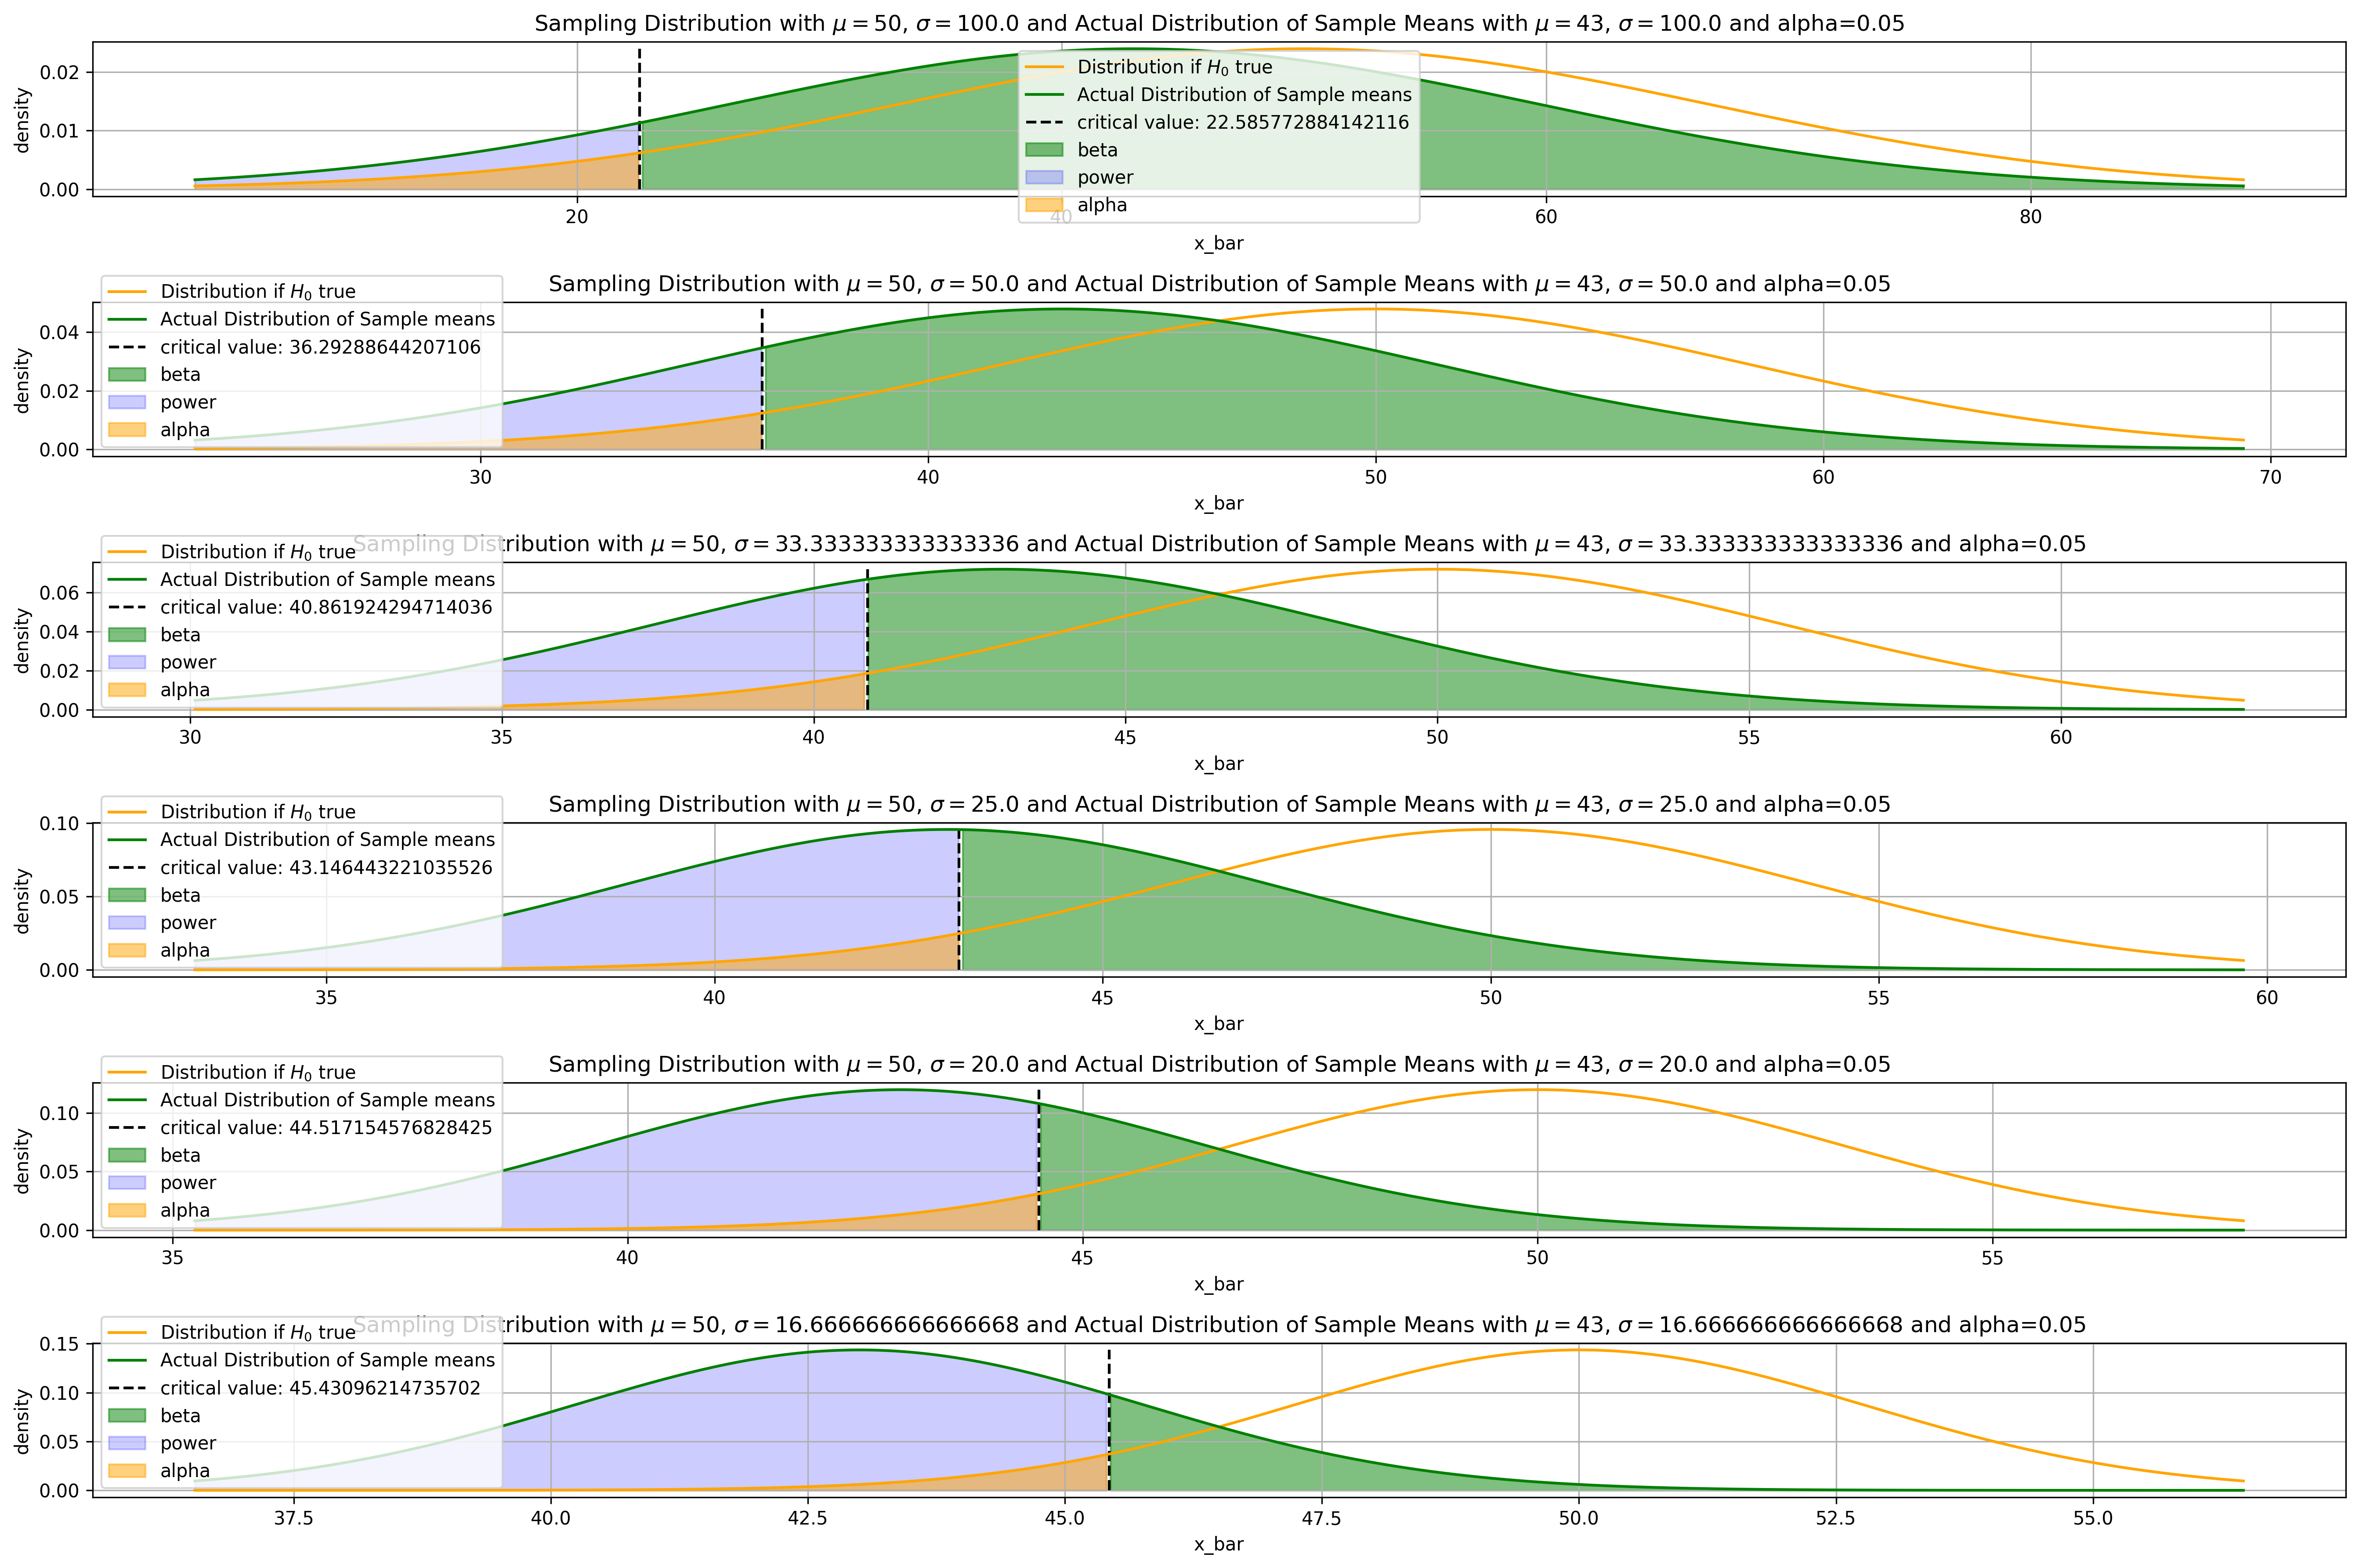

In [62]:
fig, ax = plt.subplots(6, 1)
for idx in range(1, 7):
    ax[idx-1] = plot_H0_true_dist_and_actual_dist(ax=ax[idx-1], H0_mean=50, actual_mean=43, 
                                                std=100/idx, n=36, alpha=0.05)
    
plt.tight_layout()
plt.show();

---
# Analysis of Variance (ANOVA)<a id='anova'></a>

## One-Way Anova

E.g. Imagine we have $k = 3$ different populations and a random sample of 3 individuals are drawn from each population (Total sample size $N = 9$) and we will get their test scores. The test scores are below:

1. Population: Only eats red meat
    - Albert scored 1
    - Beatrice scored 2
    - Alice scored 5
2. Population: Only eats white meat
    - Tim scored 2
    - James scored 4
    - Tom scored 2
3. Population: Eats both red and white meat
    - Jeff scored 2
    - Samantha scored 3
    - Hilbert scored 4

In [30]:
# Create design matrix for Anova
X = np.array(
    [
        [1, 0, 0],
        [2, 0, 0],
        [5, 0, 0],
        [0, 2, 0],
        [0, 4, 0],
        [0, 2, 0],
        [0, 0, 2],
        [0, 0, 3],
        [0, 0, 4]
    ]
)
X

array([[1, 0, 0],
       [2, 0, 0],
       [5, 0, 0],
       [0, 2, 0],
       [0, 4, 0],
       [0, 2, 0],
       [0, 0, 2],
       [0, 0, 3],
       [0, 0, 4]])

Step 1: Declare Null / Alternate Hypothesis and Alpha level A priori

$$
\begin{aligned}
&H_0: \mu_1 = \mu_2 = \mu_3 \\
&H_a: \text{At least 1 Difference among the means},\,\alpha=0.05
\end{aligned}
$$

Step 2: Find degrees of freedom and $F$-critical value

$$
\begin{aligned}
Numerator: df_{between} &= k - 1 = 3 - 1 = 2 \\
Denominator: df_{within} &= N - k = 9 - 3 = 6 \\
df_{total} &= df_{between} + df_{within} = 2 + 6 = 8
\end{aligned}
$$

In [76]:
# Declare alpha level
a = 0.05
df_between, df_within = 2, 6

# Get critical value using significance level and degrees of freedom
F_crit = f.ppf(1-a, dfn=2, dfd=6) 
F_crit

5.143252849784718

Step 3a: Calculate mean of each group $\bar{x_1},\,\bar{x_2},\,\bar{x_3}$

In [42]:
x1_bar = round(np.true_divide(X[:, 0].sum(axis=0), (X[:, 0] != 0).sum(axis=0)), 2)
x2_bar = round(np.true_divide(X[:, 1].sum(axis=0), (X[:, 1] != 0).sum(axis=0)), 2)
x3_bar = round(np.true_divide(X[:, 2].sum(axis=0), (X[:, 2] != 0).sum(axis=0)), 2)
print(x1_bar, x2_bar, x3_bar)

2.67 2.67 3.0


$$
\begin{aligned}
\bar{x_1} &= 2.67 \\
\bar{x_2} &= 2.67 \\
\bar{x_3} &= 3.00 \\
\end{aligned}
$$

Step 3b: Calculate Grand mean $\bar{x_G}$

In [44]:
x_grand = np.mean([x1_bar, x2_bar, x3_bar])
x_grand

2.78

$$
\bar{x_G} = 2.78
$$

Step 4a: Calculate Sum of Squares Total $SS_{total} = \sum^k_{j=1} \sum^{N_j}_{i=1} {((x_j)_i - \bar{x_G})}^2$

In [73]:
ss_total = np.sum((X[np.nonzero(X)] - x_grand) ** 2)
ss_total

13.5556

$$
SS_{total} = 13.56
$$

Step 4b: Calculate Sum of Squares Within $SS_{within} = \sum^k_{j=1} \sum^{N_j}_{i=1} {((x_j)_i - \bar{x_j})}^2$

In [74]:
ss_within = \
    np.sum((X[:, 0][np.nonzero(X[:, 0])] - x1_bar) ** 2) \
    + np.sum((X[:, 1][np.nonzero(X[:, 1])] - x2_bar) ** 2) \
    + np.sum((X[:, 2][np.nonzero(X[:, 2])] - x3_bar) ** 2)
ss_within

13.333400000000001

$$
SS_{within} = 13.33
$$

Step 4c: Calculate $SS_{between} = SS_{total} - SS_{within}$

In [75]:
ss_between = round(ss_total - ss_within, 2)
ss_between

0.22

Step 5a: Calculate Variance between groups $MS_{between} = \frac{SS_{between}}{df_{between}}$

In [77]:
ms_between = ss_between / df_between
ms_between

0.11

$$
MS_{between} = 0.11
$$

Step 5b: Calculate Variance within groups $MS_{within} = \frac{SS_{within}}{df_{within}}$

In [78]:
ms_within = ss_within / df_within
ms_within

2.2222333333333335

$$
MS_{within} = 2.22
$$

Step 6 (Final): Calculate $F$-statistic $F = \frac{MS_{between}}{MS_{within}}$

In [79]:
F_stat = ms_between / ms_within
F_stat

0.04949975250123749

Hence, since our $F$-statistic $= 0.05 < $ $F$-critical $=5.14$, we **fail to reject $H_0$**, and maintain that $\mu_1 = \mu_2 = \mu_3$ (No significant difference between the 3 groups).

---
# $\chi^2$ Tests<a id='cs-test'></a>

## $\chi^2$ Goodness of Fit Test

Conditions:
1. Random Sampling of data
2. Large counts / frequencies of each category in Expectation (not observation)
3. Independent samples

Example:
A shop owner expects a certain percentage of customers to come in throughout the week as follows:

| Day | Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | Total |
| --- | ------ | ------- | --------- | -------- | ------ | -------- | ----- |
| Expected (%) | 10 | 10 | 15 | 20 | 30 | 15 | 100 |
| Observed Count | 30 | 14 | 34 | 45 | 57 | 20 | 200 |
| Expected Count | 10% * 200 = 20 | 10% * 200 = 20 | 15% * 200 = 30 | 20% * 200 = 40 | 30% * 200 = 60 | 15% * 200 = 30 |

We will test:
$$
\begin{aligned}
H_0&:\,\text{Owner is correct} \\
H_\alpha&:\,\text{Owner is not correct}
\end{aligned}
$$

at an $\alpha = 0.05$ significance level / false positive (Type I error) rate.

$\chi^2$ Statistic:
$$
\begin{aligned}
\chi^2 &= \sum^k_{i=1} \frac{(\text{Observed Count}\,-\,\text{Expected Count})^2}{\text{Expected Count}} \\
&= \frac{(30 - 20)^2}{20} + \frac{(14 - 20)^2}{20} + \frac{(34 - 30)^2}{30} + \frac{(45 - 40)^2}{40} + \frac{(57 - 60)^2}{60} + \frac{(20 - 30)^2}{30}
\end{aligned}
$$

In [104]:
# Set the data and significance level
alpha = 0.05
Day = namedtuple('Day', ['name', 'observed', 'expected'])
days = [
    Day('monday', 30, 20),
    Day('tuesday', 14, 20),
    Day('wednesday', 34, 30),
    Day('thursday', 45, 40),
    Day('friday', 57, 60),
    Day('saturday', 20, 30),
]

chi_squared_stat = np.sum([(day.observed - day.expected) ** 2 / day.expected for day in days])

In [105]:
chi_squared_stat

11.441666666666666

$$
\chi^2 = 11.44
$$

Degrees of Freedom: $k - 1 = 6 - 1 = 5$

In [112]:
df = len(days) - 1

In [113]:
chi2.isf(alpha, df=df)

11.070497693516355

Our $\chi^2$ critical value @ significance level of $\alpha = 0.05$ is:

$$
\chi^2_{crit} = 11.07
$$

### Conclusion

Since $\chi^2 > \chi^2_{crit}$, it means that the probability of getting the current observations is so rare that it is highly unlikely to be due to sampling error, so we will reject the $H_0$ and conclude that statistically, he is incorrect in his prediction of the frequencies.

## $\chi^2$ Test for Homogeneity

Example:
Someone proposed that Subject preference for right and left handed people are different and so they gathered some results as follows:

Observed:

| Subject | Right | Left | Total |
| ------- | ----- | ---- | ----- |
| STEM    | 30 | 10 | 40 |
| Humanities | 15 | 25 | 40 |
| Equal | 15 | 5 | 20 |
| Total | 60 | 40 | 100 |

We state our hypotheses:

$$
\begin{aligned}
H_0 &:\,\text{No difference in subject preference} \\
H_\alpha &:\,\text{There's a difference in subject preference} \\
\end{aligned}
$$

Expected: Since we expect there to be no difference between groups, we expect the left and right handed groups to have the same proportion of people in each subject as the total population proportions

| Subject | Right | Left |
| ------- | ----- | ---- |
| STEM    | 40% * 60 = 24 | 40% * 40 = 16 |
| Humanities | 40% * 60 = 24 | 40% * 40 = 16 |
| Equal | 20% * 60 = 12 | 20% * 40 = 8 |
| Total | 60 | 40 |

Now let's calculate our $\chi^2$ statistic and test our hypothesis at a significance level of $\alpha = 0.05$.

In [133]:
# Set the data
observed = np.array([
    [30, 10],
    [15, 25],
    [15, 5]
])

expected = np.array([
    [24, 16],
    [24, 16],
    [12, 8]
])

chi_squared_stat = np.sum((observed.flatten() - expected.flatten()) ** 2 / expected.flatten())
df = (3 - 1) * (2 - 1) # (Num rows - 1)(Num cols - 1)
alpha = 0.05

In [141]:
p_val = 1 - chi2.cdf(chi_squared_stat, df=df)
p_val

0.0008838263069350649

### Conclusion

Hence, since the $p$-value $= 0.000884 < \alpha = 0.05$, we reject the $H_0$ because our observations show that the disrepancy in the distribution of counts we observe vs. expect is statistically significant. The probability that the values we observe are due to random sampling error is too small to be true.

---
# A/B Testing

## Parametric Vs Non-Parametric Tests

---
# Metrics

## False Positive Rate: 
- Ratio of false positives to total negatives, $\frac{\text{FP} }{\text{N} }=\frac{\text{FP} }{\text{FP + TN} }$

## False Negative Rate: 
- Ratio of false negatives to total positives, $\frac{\text{FN} }{\text{P} }=\frac{\text{FN} }{\text{FN + TP} }$

## Precision: 
- Ratio of true positives to total positives and false positives, $\frac{\text{TP} }{\text{TP + FP} }$

## Recall: 
- Ratio of true positives to total positives and false negatives, $\frac{\text{TP} }{\text{TP + FN} }$

## Accuracy:
- Ratio of correct classifications to total classifications, $\frac{\text{TP + TN} }{\text{TP + FP + TN + FN} }$

## F-beta:
- Weighted Harmonic Mean of precision and recall, $(1 + \beta^2) \times \frac{\text{precision } \times \text{ recall} }{\beta^2 \times \text{precision } + \text{ recall} }$

## ROC-AUC:

---
## Resources:

Probability:
- [Overview of Some Discrete Probability Distributions(Binomial,Geometric,Hypergeometric,Poisson,NegB)](https://www.youtube.com/watch?v=UrOXRvG9oYE)
- [Conjugate Prior Wiki](https://en.wikipedia.org/wiki/Conjugate_prior)
- [Exponential family wiki](https://en.wikipedia.org/wiki/Exponential_family)
- [What is the gamma distribution used for?](https://www.quora.com/What-is-gamma-distribution-used-for)
- [Beta & Dirichlet distribution video](https://www.youtube.com/watch?v=CEVELIz4WXM)

Statistics:
- [JBStatistics Hypothesis testing videos](https://www.youtube.com/watch?v=7mE-K_w1v90)
- Anova
    - [One-way Anova by hand](https://www.youtube.com/watch?v=q48uKU_KWas)
- Chi-squared Test
    - [Khan Academy on Chi-squared](https://www.khanacademy.org/math/statistics-probability/inference-categorical-data-chi-square-tests)